In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#def line(w=0,x,b=0)#y=mx+c
def line(x,w=0,b=0):
    y=w*x+b #y=mx+c
    return y

# Logical Sketch

For making model for assignment by matplotlib

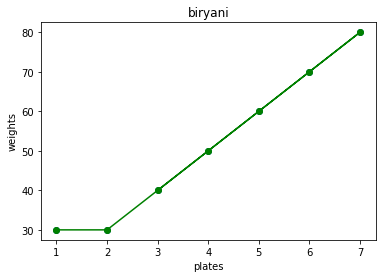

In [5]:

x_values= [3,5,7,6,4,2,1]
y_values= [40,60,80,70,50,30,30]
def function(x_values,y_values):
    plt.scatter(x_values,y_values)
    plt.plot(x_values,y_values, color='green', marker='o', linestyle='solid')
    # add a title
    plt.title("biryani")
    # add a label to the y-axis and x-axis
    plt.ylabel("weights")
    plt.xlabel("plates")
    plt.show()
    
function(x_values,y_values)
#function(3,40)
#function(6,70)



# Working with model (Manual Regression Method)

In [6]:
pd.read_csv('assignment keras.csv')

,plates,weight
0,3,40
1,5,60
2,7,80
3,6,70
4,4,50
5,2,30
6,1,30


In [7]:
df=pd.read_csv('assignment keras.csv')

In [8]:
df.describe()

,plates,weight
count,7.000000,7.000000
mean,4.000000,51.428571
std,2.160247,19.518001
min,1.000000,30.000000
25%,2.500000,35.000000
50%,4.000000,50.000000
75%,5.500000,65.000000
max,7.000000,80.000000


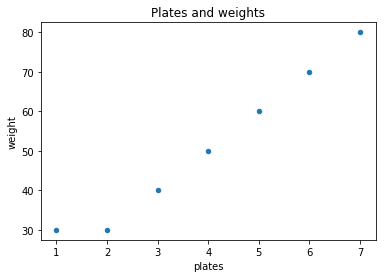

In [9]:
df.plot(kind='scatter',x='plates',y='weight',title='Plates and weights')

# Manual Tuning

In [10]:
def line(x, w=10, b=10):
    y=w*x+b          #y=mx+c
    return y

# Loss Function

In [35]:
def loss_function(y_true,y_pred):
    s=y_true-y_pred      #Not used square here
    return s.mean()

In [36]:
X=df[['plates']].values
y_true=df[['weight']].values

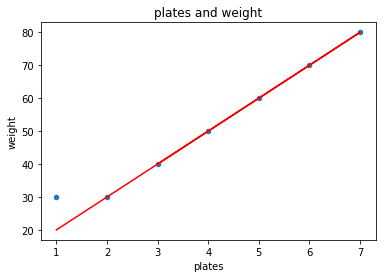

In [37]:
y_pred=line(X)

df.plot(kind='scatter',x='plates',y='weight',title='plates and weight')
plt.plot(X,y_pred,color='red')

In [38]:
y_pred

array([[40],
       [60],
       [80],
       [70],
       [50],
       [30],
       [20]], dtype=int64)

In [39]:
y_true

array([[40],
       [60],
       [80],
       [70],
       [50],
       [30],
       [30]], dtype=int64)

In [40]:
loss_function(y_true,y_pred) #1.42 is because 10/7(average). It is not telling me probability of the system!

1.4285714285714286

# Now working with model using optimizers and keras

In [43]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

In [45]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(Adam(lr=0.7),'mean_squared_error')

In [51]:
model.fit(X,y_true,epochs=40)

Epoch 1/40
7/7 [==============================] - 0s 27ms/step - loss: 2478.1086
Epoch 2/40
7/7 [==============================] - 0s 199us/step - loss: 2118.2371
Epoch 3/40
7/7 [==============================] - 0s 465us/step - loss: 1787.6864
Epoch 4/40
7/7 [==============================] - 0s 463us/step - loss: 1486.8645
Epoch 5/40
7/7 [==============================] - 0s 620us/step - loss: 1216.0150
Epoch 6/40
7/7 [==============================] - 0s 227us/step - loss: 975.1713
Epoch 7/40
7/7 [==============================] - 0s 694us/step - loss: 764.1295
Epoch 8/40
7/7 [==============================] - 0s 453us/step - loss: 582.4126
Epoch 9/40
7/7 [==============================] - 0s 399us/step - loss: 429.2327
Epoch 10/40
7/7 [==============================] - 0s 406us/step - loss: 303.4622
Epoch 11/40
7/7 [==============================] - 0s 323us/step - loss: 203.6109
Epoch 12/40
7/7 [==============================] - 0s 810us/step - loss: 127.8163
Epoch 13/40
7/7 [====

In [52]:
y_pred1=model.predict(X)

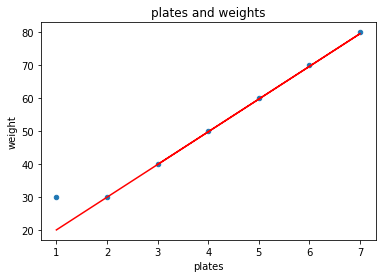

In [55]:
df.plot(kind='scatter',x='plates',y='weight',title='plates and weights')
plt.plot(X,y_pred1, color='red')

In [56]:
w,b=model.get_weights()

In [57]:
w

array([[9.9428425]], dtype=float32)

In [58]:
b

array([9.985979], dtype=float32)